<a href="https://www.kaggle.com/code/umarzafar/israel-palestine-war-life-loss-deaths-eda?scriptVersionId=152467990" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center>
<img src="https://media.lrng.org/31/84/f8f366b3fa9150c167a926e2d3730047a9a3-800x400.png" width=600>
</center>
<div style="padding:20px; 
            color:#ffffff;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ffffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">ISRAEL-PALESTINE CONFLICT LIFE LOSSES</div>

<center>
<img src="https://e3.365dm.com/23/11/1600x900/skynews-israel-palestine-explainer_6345042.jpg?20231102075930" width=600>
</center>

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
1. [Key Insight Into the EDA](#table_of_contents)
2. [Importing Files and Libraries 📚](#Importing_Files_and_Libraries)
3. [A Bird Eye View of Data 💾](#headers)
4. [Feature Engineering ⚙️](#pprint)
 *        [Smartly Handling Missing Values ⚒️](#headers)
 *        [Creating New Feature: ⏳](#headers)
    
    
5. [Exploratory Data Analysis (EDA)📊](#latex)
 * [Deaths Count by Years](#headers)
 * [Death Counts by Gender](#headers)
 * [Death Count by Gender by Citizenship](#headers)
 * [Death Counts by Gender w.r.t Year](#headers)
 * [Age Distribution of Deaths](#headers)
 * [Death Count by Citizenship and Age](#headers)
 * [Death Count among different Citizens of Different Age](#headers)
 * [Which Cities recorded the Most Deaths](#headers)
 * [Which Year Reported the Most Deaths by Gender](#headers)
 * [Most Deaths Occured in Which Years w.r.t Months](#headers)
 * [Which Injury caused the Most Deaths](#headers)
 * [Which injury Killed most Citizens of Israel-Palestine](#headers)
 * [Who's Responsible for Killings](#headers)
 * [Which Year reported the most Deaths among different Age groups](#headers)
 * [Which Cities recorded the Most Deaths Geospatially](#headers)
 * [Which Ammunition is responsible for Deaths](#headers)




# 1. Key Insight into the EDA

<div style="padding:20px; 
            color:#36FF00;
            margin:10px;
            font-size:110%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #36FF00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">
    
1. Year 2014 is recorded the most Deaths(2332 deaths) followed by the years 2002 and 2009.
2. 87.2% of total Deaths reported Among Males and 12.8% among Females
3. Palestine:
*  *  Total Male Deaths: 9001
*  *  Total Female Deaths:698
    
    
4. Israel:
    
*  *  Total Male Deaths: 1091
*  *  Total Female Deaths:331
    
    
5. Jordon: 1 Death
6. America: 1 Death
    
7. Deaths with Age Group:
*  *     Palestine's Majority of Deaths' age : 17-35
*  *     Israel's Majoity of Deaths' age is Uniformly Ditributed(1-85 years) 
*  *     Deaths Among Male Palestinians are in the age group 14-40
*  *     Deaths Among Female Palestinians are in the age group 16-50
*  *     Deatgs Among Male and Female Israelis are Uniformaly Distributed
*  *     6,133 Palestinians between the age of 20-42 died as compared to 423 Israelis died          within the same age-group
    
    
8.  Deaths w.r.t Years
    
*  * Majority of Palestinians between the age group 16-40 died in the years 2009 and 2014
*  * Most of Israelis Deaths are reported Between the years 2000-2005
*  * Only 1 American and 1 Jordonian died in the year 2016
    
    
9. Fatalities w.r.t Place of Residence
*  *  Gaza District recorded the Most Deaths(4284)
*  *  Khan Younas is the 2nd Most deaths' District(1367)
*  *  West Bank recorded the Least Deaths(4)
    
    
10. Reasons of Casualties:
*  *  91.2% deaths are due to GunFire Injury(Total 9688  Gunfire Deaths)
*  * Total 9688 Palestinians and 449 Isrealis died due to GunFire

    
11. Fatalities caused by:
*  *  89% Fatalities are caused by Israeli Security Forces
*  *  9.24% are caused by Palestinian Civilians
*  *  0.8% are caused by Palestinian Civilians
    
    
12.  Ammunition Used in Conflict:
*  *  Missiles killed 2877 people on both sides
*  *  Live Ammunition killed 1514 people
    
</div>

# 2. Importing Files and Libraries 📚

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fatalities-in-the-israeli-palestinian/fatalities_isr_pse_conflict_2000_to_2023.csv
/kaggle/input/israel-geojson-file/israel.geojson
/kaggle/input/israeli-cities-geojson/cities.json


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

# 3. A Bird Eye View of Data 💾

In [3]:
data = pd.read_csv('/kaggle/input/fatalities-in-the-israeli-palestinian/fatalities_isr_pse_conflict_2000_to_2023.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [5]:
data.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [6]:
data.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

# 4. FEATURE ENGINEERING ⚙️

# 4.1 Smartly Handling Missing Values ⚒️

Column **'Age'** has **129 Missing Values**. 
* The Best approach is applying '**Imputation Method'**
* **Replace** missing with the **Average value** of Age Columns

In [7]:
data['age'] = data['age'].fillna(data['age'].mean())

Column **'Gender'** has **20 Missing Values**
* Replace Missing with the **Most Frequent Value(Mode)**

In [8]:
data['gender'].value_counts()

gender
M    9681
F    1423
Name: count, dtype: int64

In [9]:
#Filling Data with Mode of column
data['gender'] = data['gender'].fillna(data['gender'].mode().iloc[0])

Column **'Type_Of_Injury'** has **291 Missing Values**
* Replace Missing with the **Most Frequent Value(Mode)**

In [10]:
data['type_of_injury'].value_counts()

type_of_injury
gunfire                         9849
explosion                        555
shelling                         311
stabbing                          48
house demolition                  25
hit by a vehicle                  18
beating                            9
stones throwing                    6
being bludgeoned with an axe       4
fire                               4
physically assaulted               2
physical assault                   1
Strangulation                      1
Name: count, dtype: int64

In [11]:
#Filling Data
data['type_of_injury'] = data['type_of_injury'].fillna(data['type_of_injury'].mode().iloc[0])

Column **'Ammunition'** has **5253 Missing Values**
* Since the Columns has **Numerous Missing Values**,it is better to create a **New Category: "Unknown Ammunition"**


In [12]:
data['ammunition'].value_counts()

ammunition
missile                        2877
live ammunition                1514
shell                           675
explosive belt                  326
bomb                            249
mortar fire                      51
knife                            37
flechette shells                 22
rubber-coated metal bullets      19
0.22-caliber bullets             16
phosphorus shell                 16
Qassam rocket                    15
car bomb                         15
teargas canister                 13
rocket                           12
grad rocket                       7
sponge rounds                     2
grenade                           2
flare bomb                        1
stun grenade                      1
rock                              1
Name: count, dtype: int64

In [13]:
#Creating New category 'Unknown Ammunition'
data['ammunition'] = data['ammunition'].fillna('Unknown Ammunition')

The other **columns with Missing Values** have **no significant Importance** in the Analysis. Theresore, **ignore them**.

# 4.2 Creating New Feature: ⏳
* **Year of Deaths**
* **Month of Deaths**

In [14]:
#The column 'date_of_event' is in String, First Convert it into Datetime
data['date_of_event'] = pd.to_datetime(data['date_of_event'])

#Creating New Columns
data['Year_of_Death'] = data['date_of_event'].dt.year

data['Month_of_Death'] = data['date_of_event'].dt.month
#Replace Month Number with Names

months = {
    1: 'January',2: 'February',3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July',8: 'August', 9: 'September',10: 'October',11: 'November',12: 'December'
        }

data['Month_of_Death'] = data['Month_of_Death'].replace(to_replace = months)

In [15]:
#Dealing with Gender Column
genders = {'M':'Male' ,'F':'Female'}
data['gender'] = data['gender'].replace(to_replace = genders)

In [16]:
p = data.copy()

# 5. Exploratory Data Analysis (EDA)📊

# 5.1 Deaths Count by Years

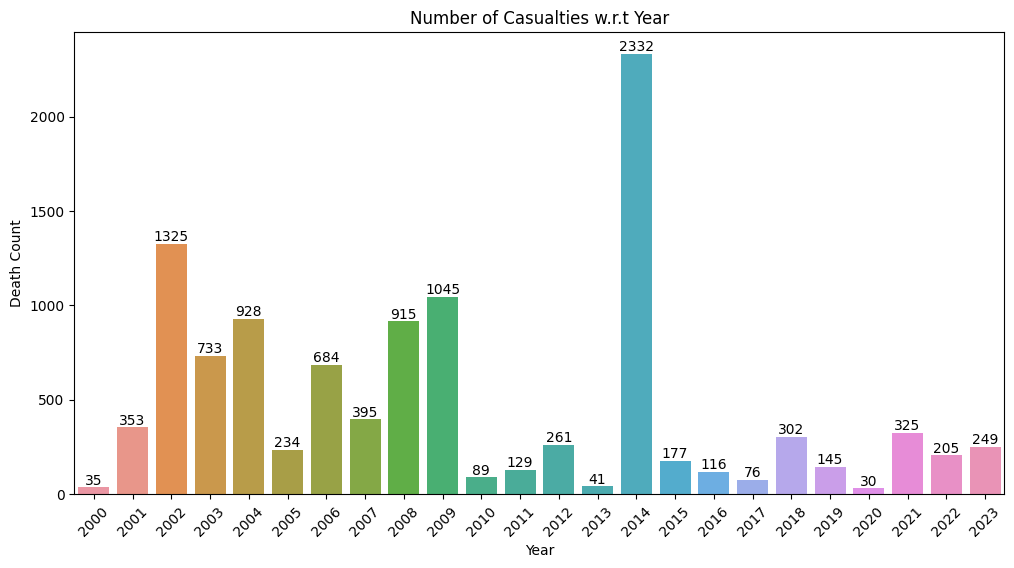

In [17]:
d = data['Year_of_Death'].value_counts()
plt.figure(figsize=(12, 6))
c_plot = sns.barplot(x=d.index, y=d.values)

# Adding labels and title

plt.xlabel('Year')
plt.ylabel('Death Count')
plt.title('Number of Casualties w.r.t Year')

c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=45)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()            

# 5.2 Death Counts by Gender:

In [18]:
import plotly.express as px

gender_counts = data['gender'].value_counts()
gender_percentage = (gender_counts / gender_counts.sum()) * 100

# Create a Pie chart using Plotly Express
fig = px.pie(data, names=gender_percentage.index, values=gender_percentage.values, 
             title='Gender Distribution in Death Toll')

# Customize the layout (optional)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0], hole=0.2)
fig.show()

# 5.3 Death Count by Gender by Citizenship:

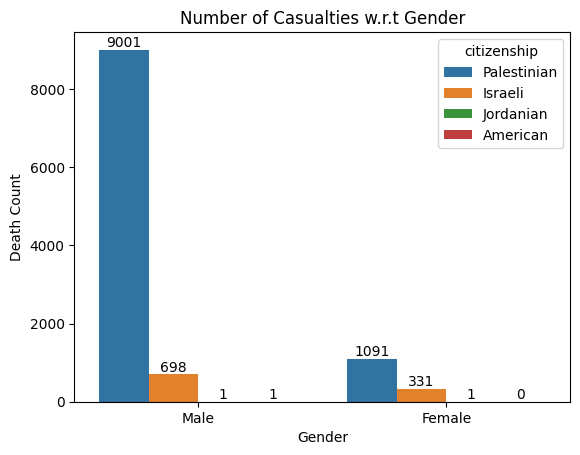

In [19]:
c_plot= sns.countplot(data, x="gender", hue="citizenship")

plt.xlabel('Gender')
plt.ylabel('Death Count')
plt.title('Number of Casualties w.r.t Gender')

c_plot.set_xticklabels(c_plot.get_xticklabels())
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()

# 5.4 Death Counts by Gender w.r.t Year

In [20]:
d= data[['Year_of_Death','gender']]
# Group by Year and Gender, count occurrences, and reset index
gender_counts = d.groupby(['Year_of_Death', 'gender']).size().reset_index(name='Count')

# Create a grouped bar chart using Plotly Express
fig = px.bar(gender_counts, x='Year_of_Death', y='Count', color='gender',
             labels={'Count': 'Gender Count', 'Year': 'Year'},
             title='Gender Distribution of Death Counts Over Years',
             #category_orders={'Gender': ['Male', 'Female']},
             category_orders={'Year': sorted(data['Year_of_Death'].unique()), 'gender': ['Male', 'Female']},
             barmode='group', text='Count')

fig.update_traces(width=0.8)
fig.update_layout(bargap=0.8)
# Adjust the size of the plot
fig.update_layout(width=720, height=600)

# Show the plot
fig.show()


# 5.5 Age Distribution of Deaths:

<Axes: xlabel='age', ylabel='Count'>

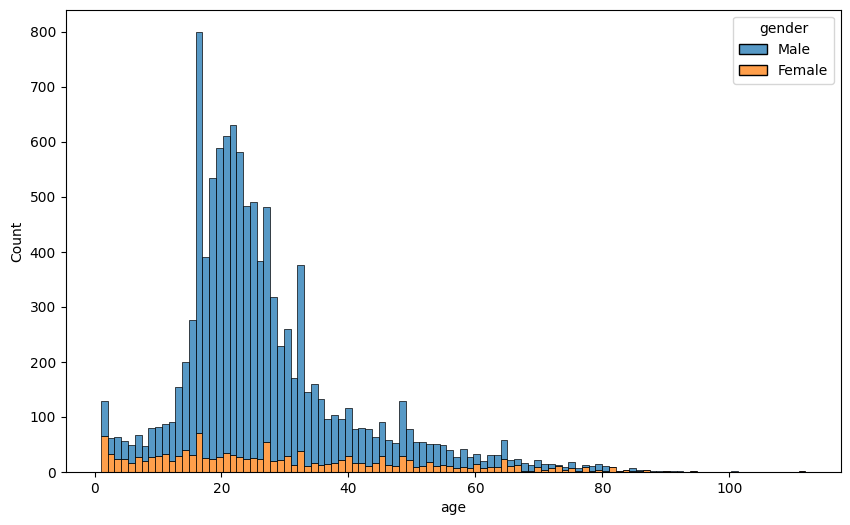

In [21]:
ages = data[['age','gender']]
plt.figure(figsize=(10, 6))
sns.histplot(data= ages, x="age", hue="gender",multiple="stack")

                        Palestine's Majority of Deaths' age : 17-35
                        Israel's Majoity of Deaths' age is Uniformly Ditributed

<Axes: xlabel='age'>

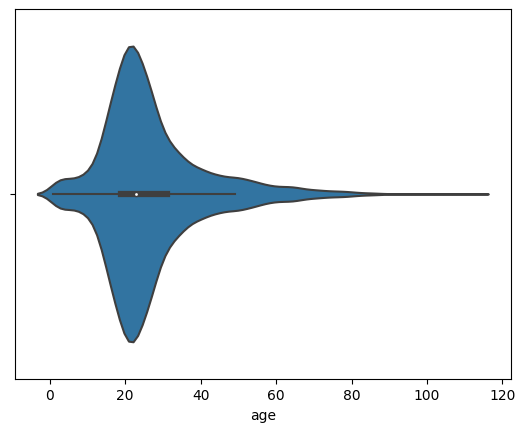

In [22]:
sns.violinplot(x=data["age"])

            Majoity of Deaths lie between the age group 16-35

<Axes: xlabel='citizenship', ylabel='age'>

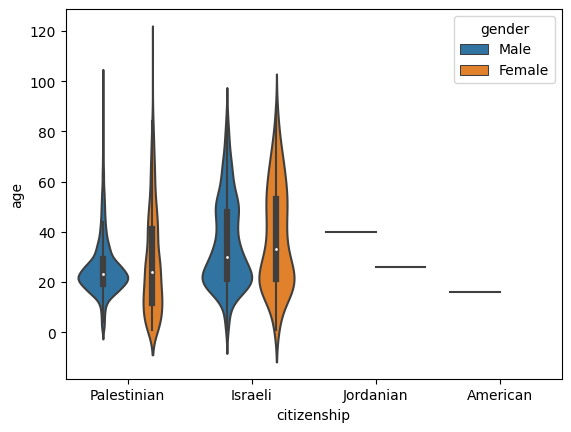

In [23]:
sns.violinplot(data=data, x=data['citizenship'], y=data['age'], hue=data['gender'])

         Deaths Among Male Palestinians are in the age group 16-40
         Deaths Among Female Palestinians are in the age group 16-40
         Deatgs Among Male and Female Israelis are Uniformaly Distributed

# 5.6 Death Count by Citizenship and Age

/tmp/ipykernel_19/2054886452.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



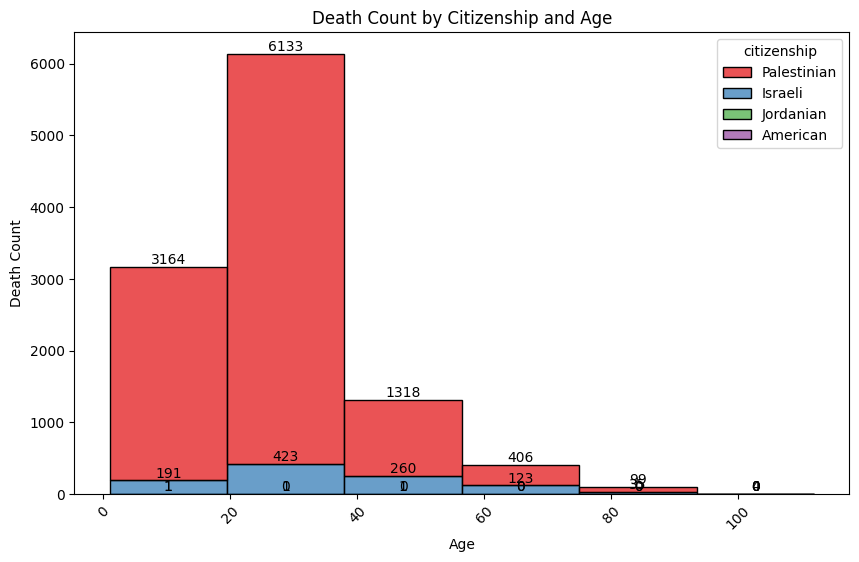

In [24]:
cit_age = data[['citizenship','age']]
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
c_plot = sns.histplot(data=cit_age, x='age', hue='citizenship', bins=6, multiple='stack', palette='Set1')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Death Count')
plt.title('Death Count by Citizenship and Age')

c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=45)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()


# Show the plot
plt.show()

    6,133 Palestinians between the age of 20-42 died as compared to only 423 Israelis

# 5.7  Death Count among different Citizens of Different Age:

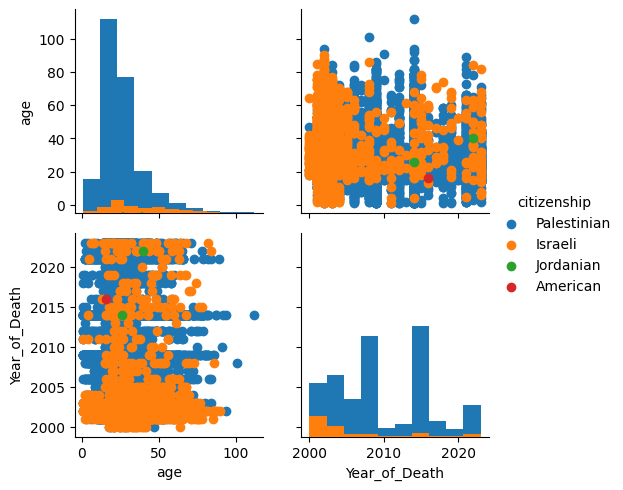

In [25]:
g = sns.PairGrid(data, hue="citizenship")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

      Majority of Palestinians between the age group 16-40 died in the years 2009 and 2014
      Most of Israelis Deaths are reported Between the years 2000-2005
           Only 1 American and 1 Jordonian died in the year 2016

# 5.8 Which Cities recorded the Most Deaths?

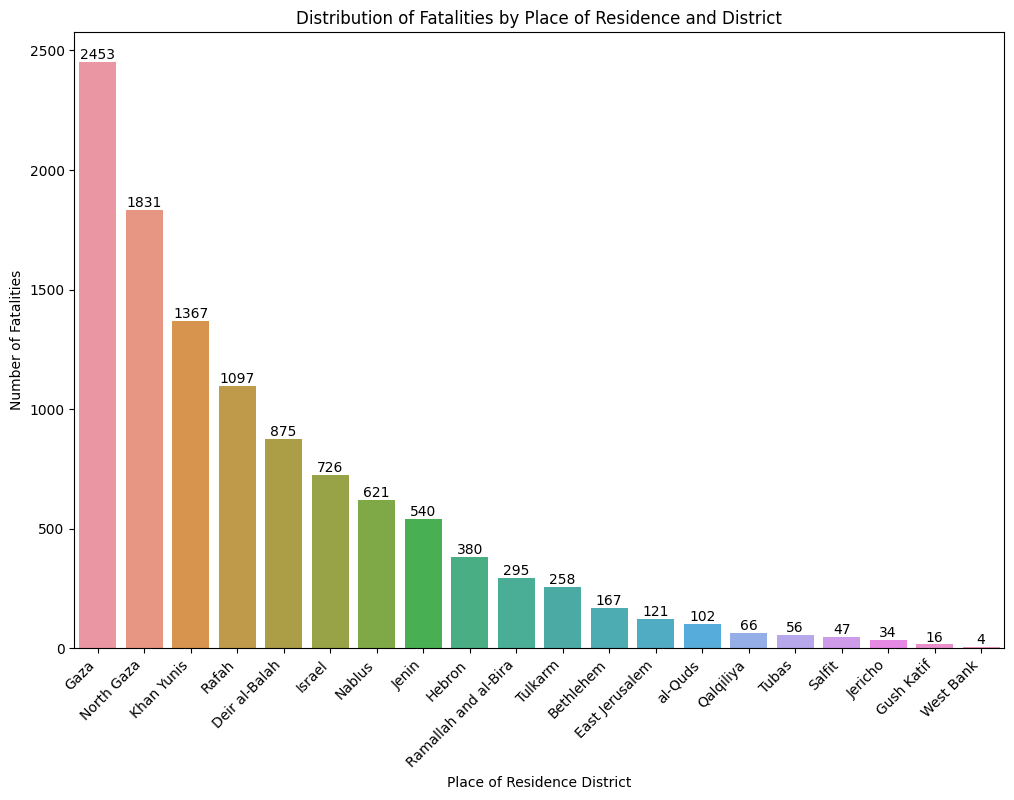

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# You can adjust the figsize based on your preference
plt.figure(figsize=(12, 8))

# Use Seaborn's countplot to visualize the distribution
c_plot = sns.countplot(x='place_of_residence_district', data=data, order=data['place_of_residence_district'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot title and labels
plt.title('Distribution of Fatalities by Place of Residence and District')
plt.xlabel('Place of Residence District')
plt.ylabel('Number of Fatalities')

c_plot.set_xticklabels(c_plot.get_xticklabels(), rotation=45)
#Container for Showing values
for i in c_plot.containers:
    c_plot.bar_label(i,)
plt.show()   


# Show the plot
plt.show()

          Gaza District recorded the Most Deaths(4284)
          Khan Younas is the 2nd Most deaths' District(1367)
          West Bank recorded the Least Deaths(4)

# 5.9 Which Year Reported the Most Deaths by Gender?

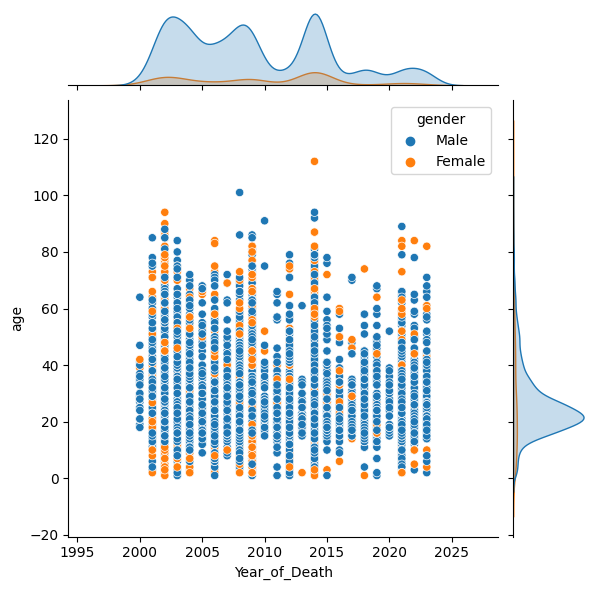

In [27]:
sns.jointplot(data=data, x="Year_of_Death", y="age", hue="gender")

# 5.10 Most Deaths Occured in Which Years w.r.t Months?

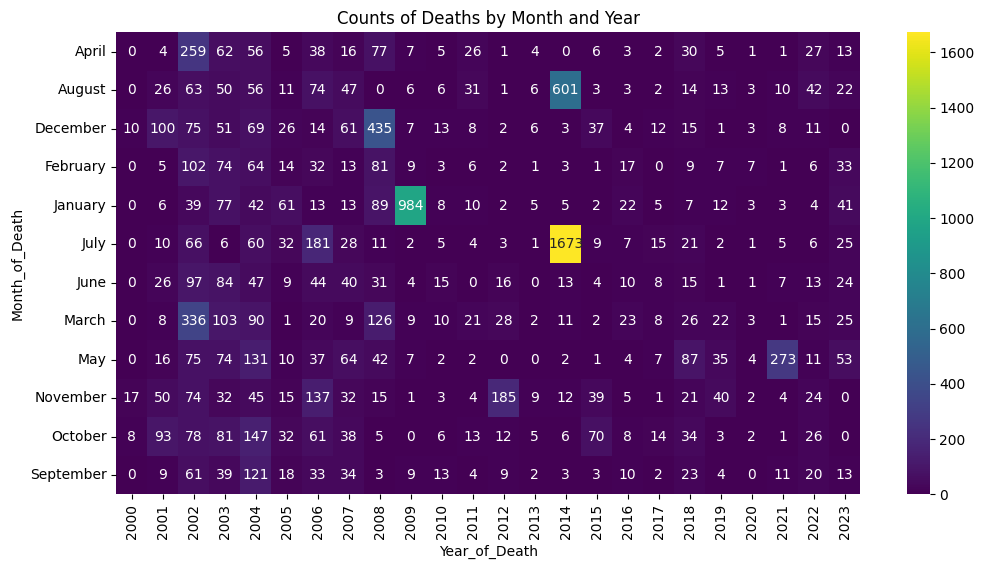

In [28]:
df = data[['Month_of_Death','Year_of_Death']]


# Create a pivot table to get counts
pivot_df = df.pivot_table(index='Month_of_Death', columns='Year_of_Death',
                          aggfunc='size', fill_value=0)

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='viridis', cbar=True)

# Customize the plot as needed
plt.title('Counts of Deaths by Month and Year')
plt.show()

# 5.11 Which Injury caused the Most Deaths?

In [29]:
data['type_of_injury'].value_counts()

type_of_injury
gunfire                         10140
explosion                         555
shelling                          311
stabbing                           48
house demolition                   25
hit by a vehicle                   18
beating                             9
stones throwing                     6
being bludgeoned with an axe        4
fire                                4
physically assaulted                2
physical assault                    1
Strangulation                       1
Name: count, dtype: int64

In [30]:
percentage_counts = data['type_of_injury'].value_counts(normalize=True) * 100

fig = px.pie(names=percentage_counts.index, values=percentage_counts.values,
             labels={'names': 'Type of Injury', 'values': 'Percentage'},
             color=percentage_counts.index, hole=0.4)  # Set hole parameter for the donut shape

fig.update_layout(width=780, height=600)

# Show the plot
fig.show()

                   91.2% deaths are due to GunFire Injury(9688 total Gunfire Deaths)

In [31]:
# Calculate the percentage of each category
percentage_counts = data['type_of_injury'].value_counts(normalize=True) * 100

# Create a Bar chart
fig = px.bar(x=percentage_counts.index, y=percentage_counts.values,
             title='Percentage Distribution of Type of Injury',
             labels={'x': 'Type of Injury', 'y': 'Percentage'},
             color=percentage_counts.index)

# Show the plot
fig.show()

# HeatMap

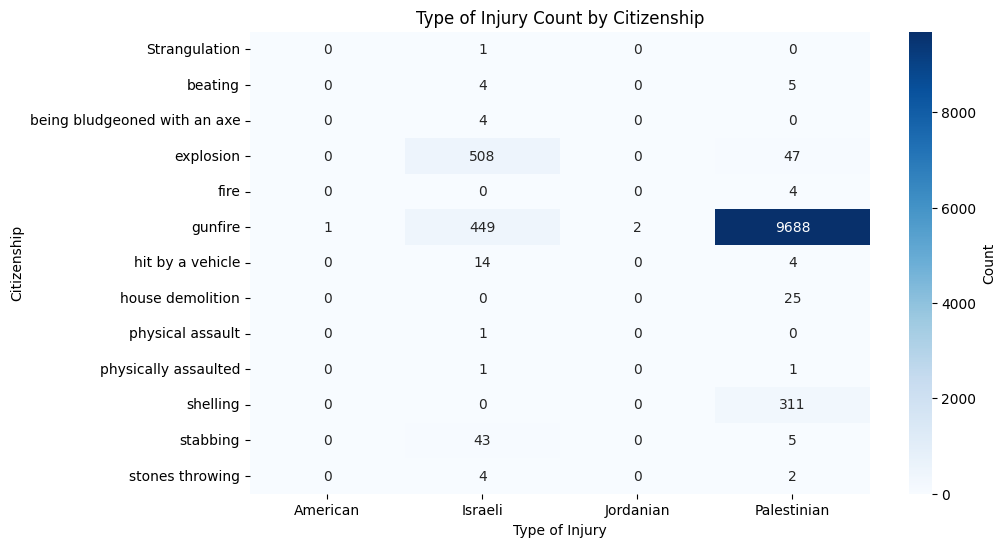

In [32]:
# Create a pivot table to get counts
d = data[['citizenship' , 'type_of_injury']]
heatmap_data = d.pivot_table(index='type_of_injury', columns='citizenship', aggfunc='size', fill_value=0)

# Create a Seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap= 'Blues', cbar_kws={'label': 'Count'})

# Adding labels and title
plt.xlabel('Type of Injury')
plt.ylabel('Citizenship')
plt.title('Type of Injury Count by Citizenship')

# Show the plot
plt.show()

    Gunfire caused 9688 deaths among Palestinians while only 449 deaths among Israelis

# 5.12 Which injury Killed most Citizens of Israel-Palestine?

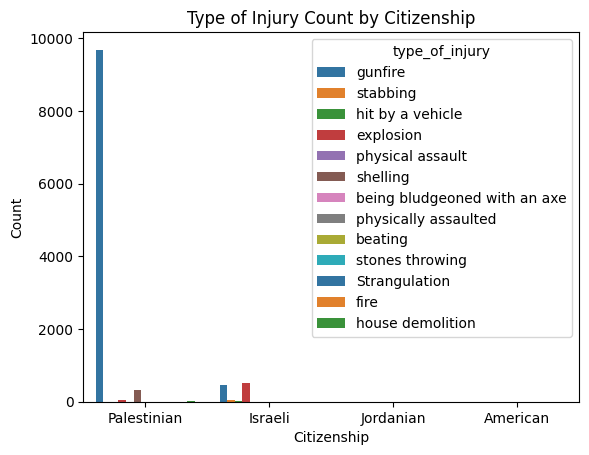

In [33]:

d = data[['citizenship','type_of_injury']]
sns.countplot(data=d, x='citizenship', hue='type_of_injury', palette='tab10')

# Adding labels and title
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.title('Type of Injury Count by Citizenship')



# Show the plot
plt.show()

        Total 9688 Palestinians and 449 Isrealis died due to GunFire

# 5.13 Who's Responsible for Killings?

In [34]:
# Create a Pie chart using Plotly Express
d = data['killed_by'].value_counts()
fig = px.pie(d, names=d.index, 
             values=d.values, 
             title='Gender Distribution in Death Toll')

# Customize the layout (optional)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0], hole=0.2)
fig.show()

                      89% Fatalities are caused by Israeli Security Forces
                      9.24% are caused by Palestinian Civilians
                      0.8% are caused by Palestinian Civilians

# 5.14 Which Year reported the most Deaths among different Age groups?

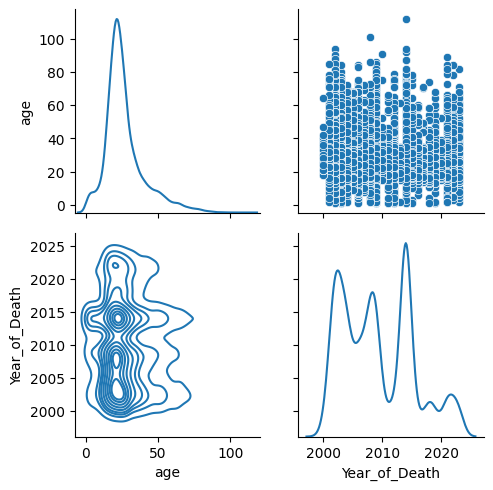

In [35]:
g = sns.PairGrid(data, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

# 5.15 Which Cities recorded the Most Deaths Geospatially?

In [36]:
import geopandas as gpd
from geopy.geocoders import Nominatim

# Assuming your DataFrame is named 'data' and has a 'event_location_district' column
districts = data['event_location_district'].unique()

# Create empty lists to store coordinates
latitudes = []
longitudes = []

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="district_geocoding")

# Geocode each district
for district in districts:
    try:
        location = geolocator.geocode(district)
        if location:
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
        else:
            latitudes.append(None)
            longitudes.append(None)
    except Exception as e:
        print(f"Error geocoding {district}: {e}")
        latitudes.append(None)
        longitudes.append(None)

# Create a new DataFrame with district names and coordinates
coordinates_df = pd.DataFrame({
    'event_location_district': districts,
    'latitude': latitudes,
    'longitude': longitudes
})

# Merge the coordinates DataFrame with your original DataFrame
data_with_coordinates = data.merge(coordinates_df, on='event_location_district', how='left')

# Display the merged DataFrame
#print(data_with_coordinates.head())

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.



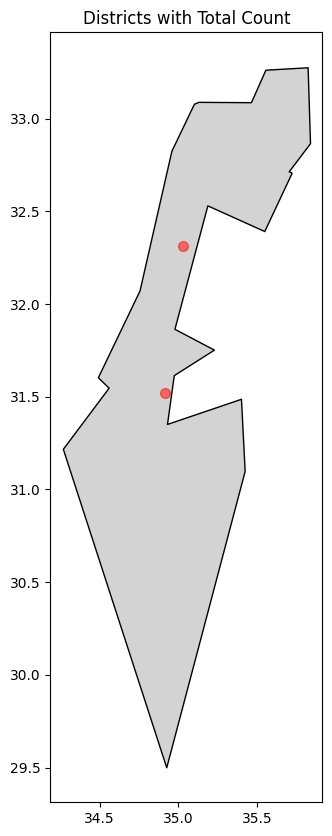

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Read your dataset
# Assuming you have a DataFrame named 'df' with columns 'District Name', 'Longitude', and 'Latitude'

# Step 2: Create a GeoDataFrame
geometry = gpd.points_from_xy(coordinates_df['longitude'], coordinates_df['latitude'])
gdf = gpd.GeoDataFrame(coordinates_df, geometry=geometry, crs="EPSG:4326")

# Step 3: Read GeoJSON file (replace 'path/to/districts.geojson' with your GeoJSON file)
geojson_path = '/kaggle/input/israel-geojson-file/israel.geojson'
districts_geojson = gpd.read_file(geojson_path)

# Step 4: Merge DataFrames
merged = gpd.sjoin(gdf, districts_geojson, how="inner", op="within")

# Step 5: Plot the Map
fig, ax = plt.subplots(figsize=(10, 10))
districts_geojson.plot(ax=ax, color='lightgray', edgecolor='black')
merged.plot(ax=ax, color='red', marker='o', markersize=50, alpha=0.5)

# Customize the plot as needed
plt.title('Districts with Total Count')
plt.show()


# 5.16 Which Ammunition is responsible for Deaths?

In [38]:
d = data['ammunition'].value_counts()
df = d.to_frame().reset_index()
df.columns = ['Ammunition', 'Deaths']

import plotly.express as px

# Create Treemap chart
fig = px.treemap(df, path=['Ammunition'], values='Deaths', custom_data=['Deaths'],
                 color_continuous_scale='RdBu',
                 title='Most Deaths Causing Ammunition')

# this is what I don't like, accessing traces like this
fig.data[0].textinfo = 'label+text+value+current path'

fig.layout.hovermode = False
# Show the plot
fig.show()

               Missiles killed 2877 people on both sides
               Live Ammunition killed 1514 people

# 6. Conclusion

A lasting resolution to the Israel-Palestine conflict requires **Diplomatic Negotiations, Mutual Recognition, and Compromise**. **International mediation, respect for Human Rights**, and addressing the root causes of the conflict are essential for fostering **Trust** and achieving a **Sustainable Peace agreement** between both parties.

# Kindly Upvote👍 if you find it Useful!